In [234]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [223]:
df0 = pd.read_csv("hand_data/0.csv", header=None)
print("Class 0 Shape", df0.shape)
df1 = pd.read_csv("hand_data/1.csv", header=None)
print("Class 1 Shape", df1.shape)
df2 = pd.read_csv("hand_data/2.csv", header=None)
print("Class 2 Shape", df2.shape)
df3 = pd.read_csv("hand_data/3.csv", header=None)
print("Class 3 Shape", df3.shape)

df = pd.concat([df0,df1,df2,df3])
data = df.values

Class 0 Shape (2910, 65)
Class 1 Shape (2903, 65)
Class 2 Shape (2943, 65)
Class 3 Shape (2922, 65)


In [224]:
df0.shape, df1.shape, df2.shape, df3.shape, data.shape

((2910, 65), (2903, 65), (2943, 65), (2922, 65), (11678, 65))

In [225]:
x = df.loc[:,0:63]
y = df[64]

In [226]:
x = np.array(x)
y= np.array(y)

In [227]:
x = x.reshape(x.shape[0]*x.shape[1], 1)
sc = StandardScaler()
x = sc.fit_transform(x)
x = x.reshape((-1, 8, 8))


print(x.shape)
print(y.shape)

(11678, 8, 8)
(11678,)


In [228]:
y = np.eye(np.max(y) + 1)[y]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,stratify=y)

In [229]:
print ("X_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

X_train shape: (8758, 8, 8)
y_train shape: (8758, 4)
x_test shape: (2920, 8, 8)
y_test shape: (2920, 4)


In [231]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(x_train.shape[1], 8)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

ValueError: Input 0 of layer "conv2d_89" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 8, 8)

In [235]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 8)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 64))
model.add(Dense(units = 128))

model.add(Dense(units = 4, activation="softmax"))
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics=["accuracy"])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 8, 50)             11800     
                                                                 
 dropout_51 (Dropout)        (None, 8, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_52 (Dropout)        (None, 8, 50)             0         
                                                                 
 lstm_6 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_53 (Dropout)        (None, 8, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [236]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [237]:
history=model.fit(x_train, y_train, epochs = 25, batch_size = 32, verbose=2 , callbacks=[callback],validation_split=0.2,)

Epoch 1/25
219/219 - 22s - loss: 0.4019 - accuracy: 0.5360 - val_loss: 0.2700 - val_accuracy: 0.7409 - 22s/epoch - 100ms/step
Epoch 2/25
219/219 - 4s - loss: 0.2086 - accuracy: 0.8160 - val_loss: 0.1288 - val_accuracy: 0.9035 - 4s/epoch - 18ms/step
Epoch 3/25
219/219 - 4s - loss: 0.1135 - accuracy: 0.9214 - val_loss: 0.0839 - val_accuracy: 0.9441 - 4s/epoch - 18ms/step
Epoch 4/25
219/219 - 4s - loss: 0.0841 - accuracy: 0.9455 - val_loss: 0.0749 - val_accuracy: 0.9458 - 4s/epoch - 20ms/step
Epoch 5/25
219/219 - 5s - loss: 0.0686 - accuracy: 0.9533 - val_loss: 0.0643 - val_accuracy: 0.9532 - 5s/epoch - 21ms/step
Epoch 6/25
219/219 - 4s - loss: 0.0610 - accuracy: 0.9607 - val_loss: 0.0620 - val_accuracy: 0.9572 - 4s/epoch - 18ms/step
Epoch 7/25
219/219 - 4s - loss: 0.0548 - accuracy: 0.9642 - val_loss: 0.0552 - val_accuracy: 0.9578 - 4s/epoch - 17ms/step
Epoch 8/25
219/219 - 4s - loss: 0.0496 - accuracy: 0.9690 - val_loss: 0.0762 - val_accuracy: 0.9521 - 4s/epoch - 17ms/step
Epoch 9/25
21

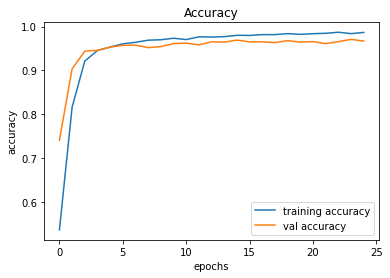

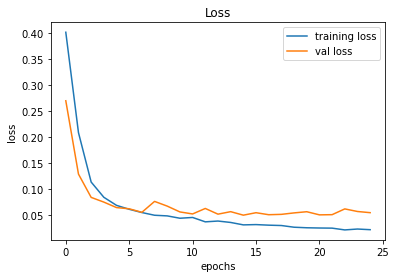

In [238]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()